***
# <font color=blue>UNSUPERVISED LEARNING</font>
# <font color=blue>Practice with K-means</font>
# <font color=blue>(lecturer version)</font>
<div style="text-align: right"><font color=magenta>Andrea De Simone</font></div>
***

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

***
# K-means Clustering

## 1. 2-D Clustering

### 1.1 Load Dataset 1

In [3]:
# Load data
X = np.loadtxt('dataset1.csv', delimiter=',')
print(X[:10])
print(X.shape)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]
 [1.24792268 4.93267846]
 [1.97619886 4.43489674]
 [2.23454135 5.05547168]
 [2.98340757 4.84046406]
 [2.97970391 4.80671081]]
(300, 2)


### 1.2 Find Centroids

In [4]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [5]:
def cluster_assignment(X, centroids):  
    """
    Assign points to class of the closest centroid
    """
    
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    # loop over dataset
    for i in range(m):
        
        min_dist = 1000000    
        
        # loop over clusters (centroids)
        for j in range(k):
            
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            
            if dist < min_dist:
                min_dist = dist
                idx[i] = j

    return(idx)

In [7]:
idx = cluster_assignment(X, initial_centroids)  
idx[:5]

array([0., 2., 1., 0., 0.])

In [8]:
def move_centroids(X, idx, k):  
    """
    Centroids are simple avg of intra-cluster distances
    """
    m, n = X.shape
    centroids = np.zeros((k, n))

    # loop over centroids
    for i in range(k):
        # cluster partitions
        indices = np.where(idx == i)
        # update centroid        
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()

    return(centroids)

In [9]:
move_centroids(X, idx, 3)  

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

### 1.3 K-means

In [10]:
def run_k_means(X, initial_centroids, tolerance):  
    """
    Run K-means algorithm. 
    Stop when cluster assignment are stable (within tolerance).
    Return cluster assignments and centroid positions.
    """
    m, n = X.shape
    k = initial_centroids.shape[0]

    idx = np.zeros(m)
    centroids = initial_centroids
    
    #tolerance = 1e-3
    iteration = 0
    
    # Loop until assignments do not change
    while True:
        
        iteration += 1        
        idx_prev = idx
        
        idx = cluster_assignment(X, centroids)
        centroids = move_centroids(X, idx, k)
        
        if iteration > 1:
            if abs(np.mean(idx_prev-idx)) < tolerance:
                print("Converged after {:d} iterations".format(iteration))
                break
            
            # avoid infinite loop
            if iteration >= 10000:
                break
    
    return(idx, centroids)

In [11]:
idx, centroids = run_k_means(X, initial_centroids, 1e-3)  


Converged after 7 iterations


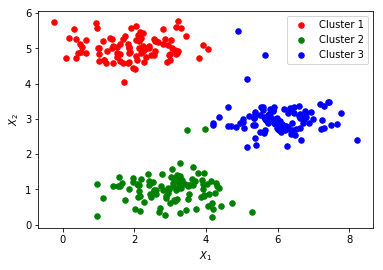

In [12]:
# Plot data
cluster1 = X[idx == 0,:]  #X[np.where(idx == 0)[0],:]  
cluster2 = X[idx == 1,:]  #X[np.where(idx == 1)[0],:]  
cluster3 = X[idx == 2,:]  #X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots()  
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')  
leg = ax.legend(frameon=True, loc='upper right')  
ax.set_xlabel('$X_1$')  
ax.set_ylabel('$X_2$')  
plt.show()

In [13]:
def initialize_centroids(X, k): 
    """ 
    Random Initialization of k centroids
    """
    
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)

    for i in range(k):
        centroids[i,:] = X[idx[i],:]

    return(centroids)

In [14]:
initialize_centroids(X, 3)  

array([[5.02432984, 2.98683179],
       [3.00677254, 0.62519128],
       [0.94048944, 5.71556802]])

In [15]:
idx, centroids = run_k_means(X, initialize_centroids(X, 3), 1e-3  )
centroids

Converged after 4 iterations


array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])

In [16]:
km = KMeans(n_clusters=3, init='random')
km.fit(X)
print(km.cluster_centers_)

[[6.03366736 3.00052511]
 [3.04367119 1.01541041]
 [1.95399466 5.02557006]]


### 1.4  Choose K

In [62]:
# Loss function
def Loss(X, idx, centroids):  
    """
    Sum of intra-cluster squared distances
    """
    k = centroids.shape[0]
    loss = 0
    
    for j in range(k):
        x_cluster = X[np.where(idx == j)[0],:]
        centroid = centroids[j]
        loss += np.sum(np.square((x_cluster-centroid)))
        
    return( loss )

In [63]:
Loss(X, idx, centroids)

133.0396693732136

<font color='red'>>>> Q: compute loss function for K = 1 to 10</font>

In [76]:
Loss_list = list()
K_list = range(1,10)

for K in K_list:
    initial_centroids = initialize_centroids(X, K) 
    idx, centroids = run_k_means(X, initial_centroids, 1e-3)  
    Loss_list.append(Loss(X,idx,centroids))


Converged after 2 iterations
Converged after 21 iterations
Converged after 3 iterations
Converged after 4 iterations
Converged after 4 iterations
Converged after 18 iterations
Converged after 9 iterations
Converged after 7 iterations
Converged after 15 iterations


In [77]:
def Plot_Loss_K(Loss_list,K_list):
    
    fig, ax = plt.subplots()
    ax.plot(K_list,Loss_list, marker="o")
    ax.tick_params(labelsize=12)
    ax.set_xlabel("K", fontsize=14)
    ax.set_ylabel("Loss",fontsize=14)
    plt.show()

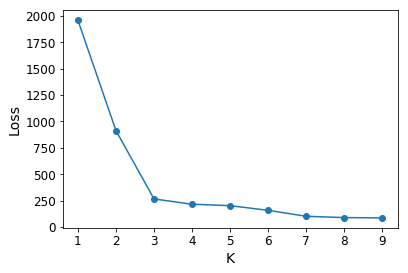

In [78]:
Plot_Loss_K(Loss_list,K_list)

## 2. Image compression

<img src="parrot.jpg", height="150" width="200">

### 2.1 Load Dataset 'Parrot'

In [192]:
#import imageio
#im = imageio.imread('parrot.jpg')
#im_arr= np.array(im)
#im_arr.shape
#np.savetxt("parrot.csv", im_arr.reshape((3,-1)), fmt="%s", delimiter=",", header=str(im_arr.shape))

In [51]:
A = np.loadtxt('dataset_parrot.csv', delimiter=',').reshape((150,200,3))
print(A[:3])
print(X.shape)
# RGB values

[[[ 103.  165.  114.]
  [  99.  161.  110.]
  [  93.  155.  106.]
  ..., 
  [  44.  108.   14.]
  [  62.  124.   47.]
  [  83.  145.   78.]]

 [[  83.  143.   91.]
  [  94.  154.  103.]
  [ 101.  160.  112.]
  ..., 
  [  54.  116.   30.]
  [  69.  132.   61.]
  [  81.  145.   84.]]

 [[  68.  122.   72.]
  [  70.  124.   74.]
  [  75.  129.   80.]
  ..., 
  [  69.  131.   54.]
  [  83.  148.   84.]
  [  89.  152.   97.]]]
(300, 2)


In [57]:
# normalize value ranges
A_norm = A / 255.

Converged after 8 iterations


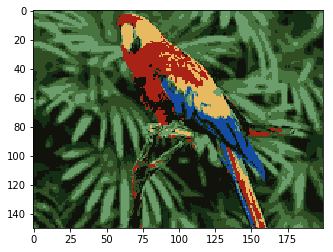

In [60]:
# Set number of colors
Ncolors = 8

# reshape the array
X = np.reshape(A_norm, (A_norm.shape[0] * A_norm.shape[1], A_norm.shape[2]))

# randomly initialize the centroids
initial_centroids = initialize_centroids(X, Ncolors)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 1e-3)

# get the closest centroids one last time
#idx = cluster_assignment(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A_norm.shape[0], A_norm.shape[1], A_norm.shape[2]))

plt.imshow(X_recovered) 
plt.show()

## 3. IRIS dataset

### 3.1 Load Dataset 'IRIS'

In [108]:
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target

In [156]:
K=9
initial_centroids = initialize_centroids(X_iris, K)

# run the algorithm
idx, centroids = run_k_means(X_iris, initial_centroids, 1e-4)

Converged after 6 iterations


In [157]:
cluster1 = X_iris[idx == 0,:]  #X_iris[np.where(idx == 0)[0],:]  
cluster2 = X_iris[idx == 1,:]  #X_iris[np.where(idx == 1)[0],:]  
cluster3 = X_iris[idx == 2,:]  #X_iris[np.where(idx == 2)[0],:]

true1 = X_iris[Y_iris == 0,:]  
true2 = X_iris[Y_iris == 1,:]  
true3 = X_iris[Y_iris == 2,:]  

In [122]:
print(cluster1.shape)
print(cluster2.shape)
print(cluster3.shape)
print("")
print(true1.shape)
print(true2.shape)
print(true3.shape)

(20, 4)
(10, 4)
(20, 4)

(50, 4)
(50, 4)
(50, 4)


In [123]:
def plot_clusters_vs_true(cluster1,cluster2,cluster3, true1, true2, true3):
    
    # Plot clusters
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(14,10))  

    ax1.set_title("Predicted")
    ax1.scatter(cluster1[:,0], cluster1[:,1], s=30, color='b',label='cluster 1')  
    ax1.scatter(cluster2[:,0], cluster2[:,1], s=30, color='r', label='cluster 2')  
    ax1.scatter(cluster3[:,0], cluster3[:,1], s=30, color='g', label='cluster 3')  
    ax1.legend(frameon=True, loc='lower right')  
    ax1.set_xlabel('sepal length [cm]')  
    ax1.set_ylabel('sepal width [cm]')  

    ax2.set_title("True")
    ax2.scatter(true1[:,0], true1[:,1], s=30, color='orange', label='setosa')  
    ax2.scatter(true2[:,0], true2[:,1], s=30, color='purple', label='versicolor')  
    ax2.scatter(true3[:,0], true3[:,1], s=30, color='pink', label='virginica')  
    ax2.legend(frameon=True, loc='lower right')  
    ax2.set_xlabel('sepal length [cm]')  
    ax2.set_ylabel('sepal width [cm]')  

    ax3.set_title("Predicted")
    ax3.scatter(cluster1[:,2], cluster1[:,3], s=30, color='b',label='cluster 1')  
    ax3.scatter(cluster2[:,2], cluster2[:,3], s=30, color='r', label='cluster 2')  
    ax3.scatter(cluster3[:,2], cluster3[:,3], s=30, color='g', label='cluster 3')  
    ax3.legend(frameon=True, loc='lower right')  
    ax3.set_xlabel('petal length [cm]')  
    ax3.set_ylabel('petal width [cm]')  

    ax4.set_title("True")
    ax4.scatter(true1[:,2], true1[:,3], s=30, color='orange', label='setosa')  
    ax4.scatter(true2[:,2], true2[:,3], s=30, color='purple', label='versicolor')  
    ax4.scatter(true3[:,2], true3[:,3], s=30, color='pink', label='virginica')  
    ax4.legend(frameon=True, loc='lower right')  
    ax4.set_xlabel('petal length [cm]')  
    ax4.set_ylabel('petal width [cm]') 

    plt.show()

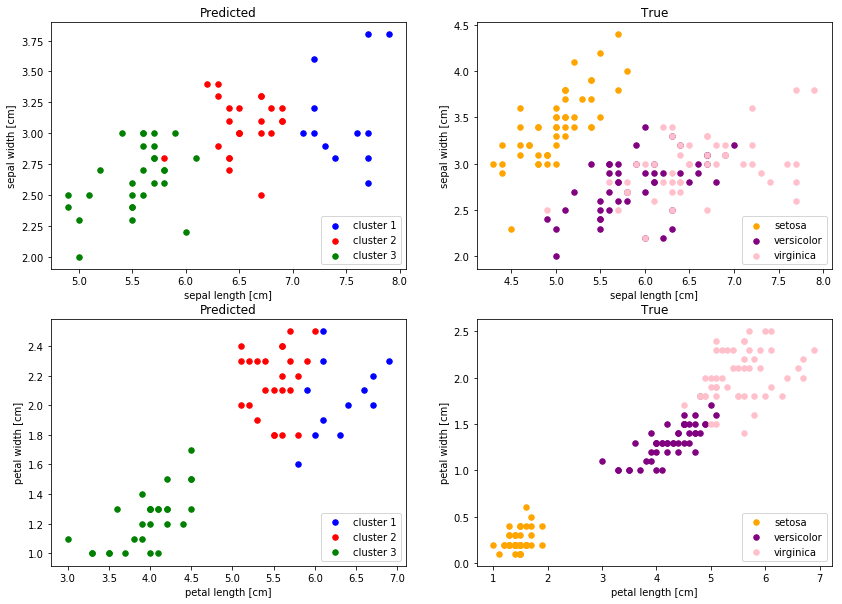

In [112]:
plot_clusters_vs_true(cluster1,cluster2,cluster3,true1,true2,true3)

### 3.x Assign Clusters to Classes

In [160]:
true_centroids = np.zeros((3, 4))
for i in range(3):
    true_centroids[i] = np.mean(X_iris[Y_iris==i],axis=0)
print(centroids)
print(true_centroids)

[[6.45       3.01666667 4.60555556 1.43888889]
 [6.2        2.3        4.7        1.45      ]
 [7.12272727 3.11363636 6.03181818 2.13181818]
 [5.24285714 2.37142857 3.44285714 1.02857143]
 [5.62857143 2.72380952 4.13333333 1.2952381 ]
 [6.20357143 2.90714286 5.18928571 1.95      ]
 [4.69       3.085      1.385      0.19      ]
 [5.12173913 3.5173913  1.53043478 0.27826087]
 [5.52857143 4.04285714 1.47142857 0.28571429]]
[[5.006 3.418 1.464 0.244]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]


In [161]:
print(np.linalg.norm(centroids[0]-true_centroids, axis=1))
print(np.linalg.norm(centroids[1]-true_centroids, axis=1))
print(np.linalg.norm(centroids[2]-true_centroids, axis=1))
print(np.linalg.norm(centroids[3]-true_centroids, axis=1))
print(np.linalg.norm(centroids[4]-true_centroids, axis=1))

[3.68012706 0.67616047 1.12308548]
[3.82121604 0.70680407 1.2893797 ]
[5.38534976 2.30544794 0.73949614]
[2.38387101 1.18130962 2.75968277]
[3.01661028 0.33710032 1.87875664]


In [162]:
# assign clusters to classes
for i in range(K):
    c = np.argmin(np.linalg.norm(centroids[i]-true_centroids, axis=1))
    idx[idx == i] = c

In [163]:
idx

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [164]:
cluster1 = X_iris[idx == 0,:]  #X_iris[np.where(idx == 0)[0],:]  
cluster2 = X_iris[idx == 1,:]  #X_iris[np.where(idx == 1)[0],:]  
cluster3 = X_iris[idx == 2,:]  #X_iris[np.where(idx == 2)[0],:]

true1 = X_iris[Y_iris == 0,:]  
true2 = X_iris[Y_iris == 1,:]  
true3 = X_iris[Y_iris == 2,:]  

print(cluster1.shape)
print(cluster2.shape)
print(cluster3.shape)

(50, 4)
(50, 4)
(50, 4)


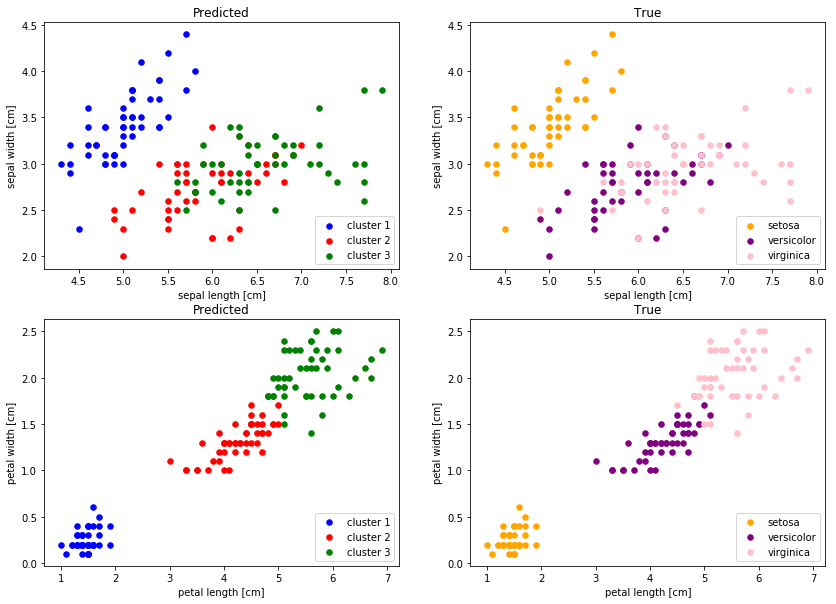

In [166]:
plot_clusters_vs_true(cluster1,cluster2,cluster3,true1,true2,true3)

### 3.x Evaluate Performance

In [165]:
tot = Y_iris.shape[0]
correct = 0 
for i in range(3):
    correct += np.sum(np.logical_and(idx == i, Y_iris == i))

print("correct assignments = {:.2f}%".format(correct/tot))

correct assignments = 0.97%


### 3.x Vary K

In [167]:
Loss_list = list()
K_list = range(1,10)

for K in K_list:
    initial_centroids = initialize_centroids(X_iris, K) 
    idx, centroids = run_k_means(X_iris, initial_centroids, 1e-10)  
    Loss_list.append(Loss(X_iris,idx,centroids))


Converged after 2 iterations


NameError: name 'Loss' is not defined

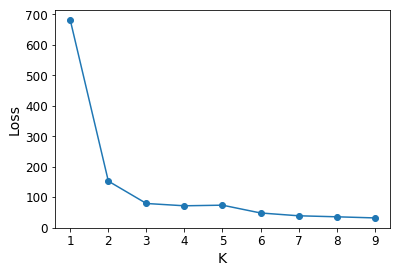

In [136]:
Plot_Loss_K(Loss_list,K_list)